# Preprocessing of BraTS2020 dataset

In [1]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from preprocessing import get_dimensions, plot_random_volume, get_channel_lists, save_training_volume_to_numpy,save_test_volume_to_numpy 

In [2]:
# Set base path for training data
base_path = "BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/"
base_path_test = "BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/"

# Take a look at the dimensions of the data
get_dimensions(base_path)

Dimensions of the 3D volume is: (240, 240, 155)
Dimensions of the 3D volume mask is: (240, 240, 155)


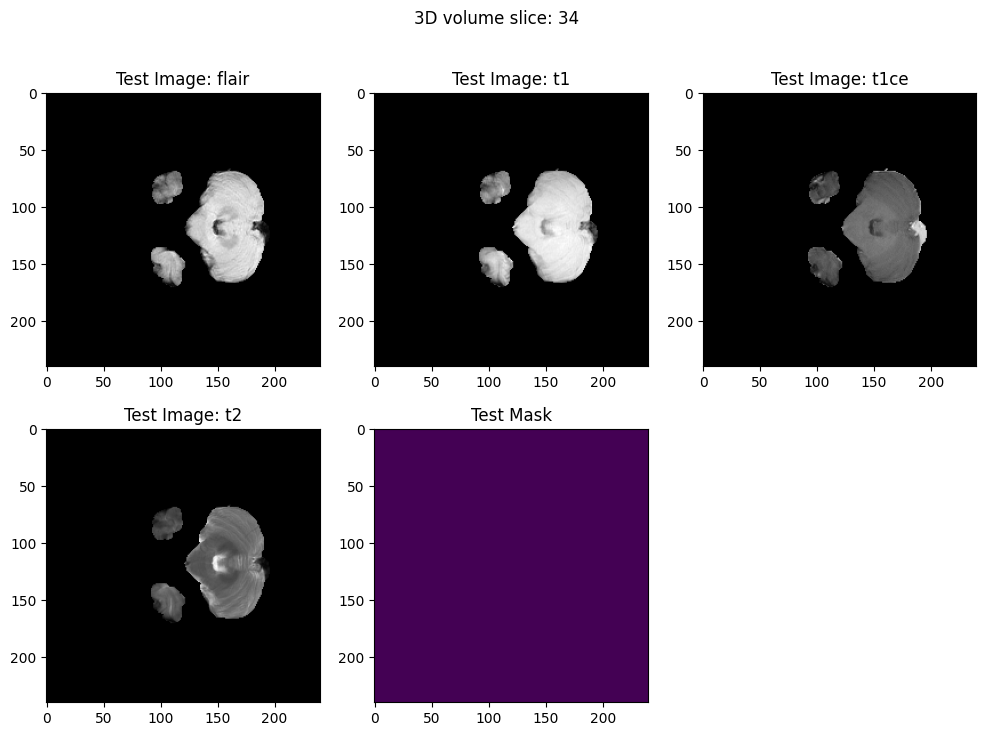

In [3]:
# Plot a random volume
plot_random_volume(base_path)

In [4]:
# Get the list of images for the channel
t1ce_lst, t2_lst, flair_lst, mask_lst = get_channel_lists(base_path)

In [8]:
t1ce_lst_test, t2_lst_test, flair_lst_test = get_channel_lists(base_path_test, test_data=True)

In [9]:
# Take a look at an entry in the list
print(t1ce_lst[0])

print("\n", t1ce_lst_test[0])

BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii

 BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/BraTS20_Validation_001/BraTS20_Validation_001_t1ce.nii


In [6]:
## Create the folders we need

top_directory = "data_dir/"
os.mkdir(top_directory)

directory = "trainval"

path = os.path.join(top_directory, directory)
os.mkdir(path)

directory_train = top_directory + directory + "/"
directory_img = "images"
train_img_path = os.path.join(directory_train, directory_img)
os.mkdir(train_img_path)

directory_mask = "masks"
train_mask_path = os.path.join(directory_train, directory_mask)
os.mkdir(train_mask_path)

test_directory = "test/"
path = os.path.join(top_directory, test_directory)
os.mkdir(path)

test_img_path = os.path.join(top_directory, test_directory+directory_img)
os.mkdir(test_img_path)

In [7]:
## Convert training volumes to numpy arrays
# Going to take some time to run
save_training_volume_to_numpy(t2_lst, t1ce_lst, flair_lst, mask_lst, train_img_path, train_mask_path)

In [10]:
## Convert testing images to numpy arrays
# Going to take some time to run
save_test_volume_to_numpy(t1ce_lst_test, t2_lst_test, flair_lst_test, test_img_path)

In [11]:
# Split the training data into training and validation data
import splitfolders
input_folder = 'data_dir/trainval/'
output_folder = 'data_dir/train_and_val/'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 688 files [00:34, 20.23 files/s]
